In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)
# 
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
# In[2]:


all_df = pd.read_excel("f://GOOGLE雲端硬碟//11jupyter//in//23222類.xlsx")

#只選取需要的欄位
cols=['collapse','I','R']
all_df=all_df[cols]

msk = numpy.random.rand(len(all_df))<0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('總共:',len(all_df),',train:',len(train_df),',test:',len(test_df))

總共: 1227 ,train: 974 ,test: 253


In [3]:
# In[3]:
#將訓練資料與測試資料進行預處理
df=all_df
ndarray = df.values
Label = ndarray[:,0]
Features = ndarray[:,1]

def preprocessdata(all_df):
    
    
    age_mean = df['I'].mean()
    df['I'] = df['I'].fillna(age_mean)

    fare_mean = df['R'].mean()
    df['R'] = df['R'].fillna(fare_mean)
    
    x_OneHot_df = pd.get_dummies(data=df)
    
    
    ndarray = df.values
    Label = ndarray[:,0]      #第0列的值
    Features = ndarray[:,1:]  #第0列沒有 第1列到最後的
    #
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))   #標準化用
    scaledFeatures=minmax_scale.fit_transform(Features)

    return scaledFeatures,Label

In [4]:
# In[4]:
train_scaledFeatures,train_Label=preprocessdata(train_df)
test_scaledFeatures,test_Label=preprocessdata(test_df)

In [5]:
from keras.utils import to_categorical
train_Label = to_categorical(train_Label)
test_Label = to_categorical(test_Label)

In [6]:
# In[7]:



model = Sequential()
model.add(Dense(units=40, 
                input_dim=2, kernel_initializer='uniform', activation='relu')) 

model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 552
Trainable params: 552
Non-trainable params: 0
_________________________________________________________________


In [7]:
# In[8]:
model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=train_scaledFeatures, 
                          y=train_Label, 
                          validation_split=0.10, 
                          epochs=40, 
                          
                          batch_size=30 , verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 1104 samples, validate on 123 samples
Epoch 1/40
 - 1s - loss: 0.2383 - acc: 0.7418 - val_loss: 0.2072 - val_acc: 0.8943
Epoch 2/40
 - 0s - loss: 0.2046 - acc: 0.7654 - val_loss: 0.1545 - val_acc: 0.8943
Epoch 3/40
 - 0s - loss: 0.1876 - acc: 0.7654 - val_loss: 0.1294 - val_acc: 0.8943
Epoch 4/40
 - 0s - loss: 0.1848 - acc: 0.7654 - val_loss: 0.1238 - val_acc: 0.8943
Epoch 5/40
 - 0s - loss: 0.1831 - acc: 0.7654 - val_loss: 0.1216 - val_acc: 0.8943
Epoch 6/40
 - 0s - loss: 0.1814 - acc: 0.7654 - val_loss: 0.1186 - val_acc: 0.8943
Epoch 7/40
 - 0s - loss: 0.1798 - acc: 0.7654 - val_loss: 0.1143 - val_acc: 0.8943
Epoch 8/40
 - 0s - loss: 0.1779 - acc: 0.7654 - val_loss: 0.1142 - val_acc: 0.8943
Epoch 9/40
 - 0s - loss: 0.1760 - acc: 0.7654 - val_loss: 0.1102 - val_acc: 0.8943
Epoch 10/40
 - 0s - loss: 0.1738 - acc: 0.7654 - val_loss: 0.1062 - val_acc: 0.8943
Epoch 11/40
 - 0s - loss: 0.1719 - acc: 0.7654 - val_loss: 0.1054 - val_ac

1227/1227 [==============================] - 0s 13us/step

	[Info] Accuracy of testing data = 77.8%


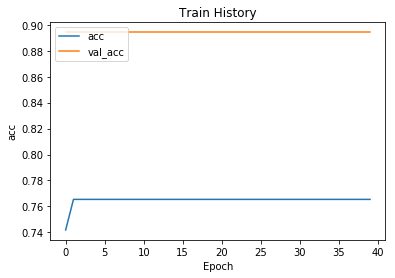

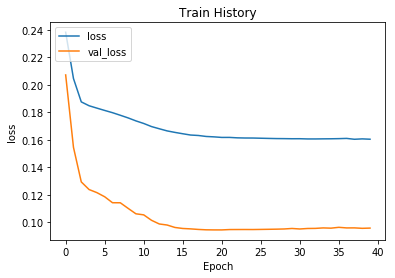

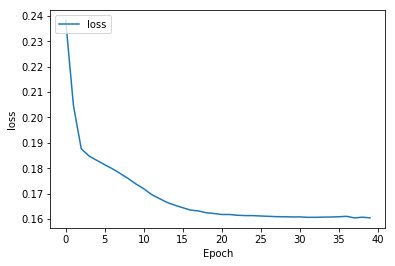

In [8]:
# In[9]:
scores = model.evaluate(x=test_scaledFeatures,y=test_Label)  
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
#      
#
plt.plot(train_history.history['acc'])  
plt.plot(train_history.history['val_acc'])  
plt.title('Train History')  
plt.ylabel('acc')  
plt.xlabel('Epoch')  
plt.legend(['acc', 'val_acc'], loc='upper left')  
plt.show() 

plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 


plt.plot(train_history.history['loss'])   
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [9]:
# In[12]:
# 預測(prediction)
#X = test_scaledFeatures[0:200,:]
predictions = model.predict(test_scaledFeatures)
# get prediction result
print('總共:',len(predictions))

總共: 1227


In [10]:
# In[13]:
np.set_printoptions(threshold=np.inf)
print(predictions)

[[0.69464886 0.30535117]
 [0.6112883  0.38871172]
 [0.6106257  0.38937432]
 [0.6106764  0.38932353]
 [0.6109608  0.38903916]
 [0.6347774  0.3652226 ]
 [0.6600272  0.33997273]
 [0.6685583  0.33144173]
 [0.6561181  0.34388188]
 [0.655201   0.34479904]
 [0.6937799  0.3062201 ]
 [0.69121337 0.30878666]
 [0.6928111  0.30718887]
 [0.69016707 0.309833  ]
 [0.6934149  0.30658507]
 [0.73039275 0.26960728]
 [0.7356389  0.26436108]
 [0.7596659  0.24033411]
 [0.788028   0.21197197]
 [0.7171855  0.28281456]
 [0.72099334 0.2790067 ]
 [0.68765914 0.31234086]
 [0.65143806 0.348562  ]
 [0.66003394 0.33996603]
 [0.64788073 0.35211933]
 [0.64645743 0.3535426 ]
 [0.6929973  0.30700272]
 [0.6123258  0.3876742 ]
 [0.6106697  0.38933033]
 [0.65392125 0.34607878]
 [0.610557   0.38944295]
 [0.7366853  0.26331475]
 [0.6112802  0.3887198 ]
 [0.667723   0.332277  ]
 [0.610157   0.38984296]
 [0.61766315 0.38233688]
 [0.78859395 0.21140605]
 [0.6244178  0.3755822 ]
 [0.6173518  0.3826482 ]
 [0.6190524  0.38094768]
